# SciPy를 이용한 최적화


-   fun: 2.0
 hess_inv: array([[ 0.5]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 9 # SciPy는 Sympy가 아니라서, Symbolic을 활용하지 못하기에 수치 미분을 함 - 1위치에서 3번 계산됨 nit가 2 이라는거는 2번 뛰엇나느 것이며, 3곳에서 9번함수를돌림..
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ 1.99999999])
        
        
        
        
        def f1p(x):
    return 2 * (x - 2)

result = sp.optimize.minimize(f1, x0, jac=f1p) ## 여기 flp 값을 미리 설정해줘야 1자리에서 3번 계산안하게 됨, 더 빨리됨
print(result)
      fun: 2.0
 hess_inv: array([[ 0.5]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ 2.]) 

In [1]:
# 연습문제 1
# 2차원 RosenBerg 함수에 대해 
# 1) 최적해에 수렴할 수 있도록 초기점을 변경하여 본다.
# 2) 그레디언트 벡터 함수를 구현하여 jac 인수로 주는 방법으로 계산 속도를 향상시킨다.

In [5]:
# 1) 최적해에 수렴할 수 있도록 초기점을 변경하여 본다.
x0 = 1 # 초기값 설정
result  = sp.optimize.minimize(f1, x0)
print(result)

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.99999999])


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


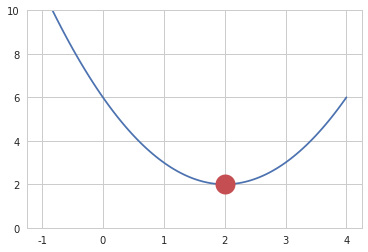

In [6]:
%matplotlib inline

def f1(x):
    return (x - 2) ** 2 + 2

xx = np.linspace(-1, 4, 100)
plt.plot(xx, f1(xx))
plt.plot(2, 2, 'ro', markersize=20)
plt.ylim(0, 10)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


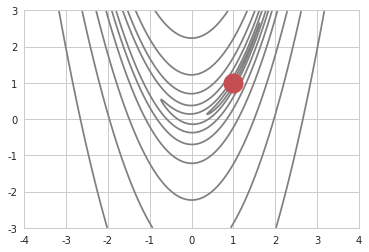

In [7]:
def f2(x, y):
    return (1 - x)**2 + 100.0 * (y - x**2)**2

xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

plt.contour(X, Y, Z, colors="gray", levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=20)

plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-3, 3, 7))
plt.show()

x = 0, g = -4.0
x = 1.6, g = -0.7999999999999998
x = 1.92, g = -0.16000000000000014


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


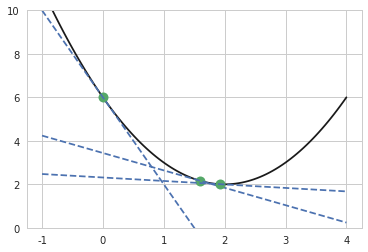

In [8]:
def f1d(x):
    """derivative of f1(x)"""
    return 2 * (x - 2.0)

xx = np.linspace(-1, 4, 100)

plt.plot(xx, f1(xx), 'k-')

# step size
mu = 0.4

# k = 0
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("x = {}, g = {}".format(x, f1d(x)))
      
# k = 1
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("x = {}, g = {}".format(x, f1d(x)))
      
# k = 2
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("x = {}, g = {}".format(x, f1d(x)))
      
plt.ylim(0, 10)
plt.show()

In [1]:
# 1) 
def f2g(x, y):
    """gradient of f2(x)"""
    return np.array((2.0 * (x - 1) - 400.0 * x * (y - x**2), 200.0 * (y - x**2)))

xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels=np.logspace(-1, 3, 10)

plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)

mu = 8e-4 # step size
s = 0.95  # for arrowr head drawing

x, y = 0, 0 # x = 1 , y = 1 에서 시작

for i in range(5):
    g = f2g(x, y)
    plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1], head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
    x = x - mu * g[0]
    y = y - mu * g[1]

plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.xticks(np.linspace(-3, 3, 7))
plt.yticks(np.linspace(-2, 2, 5))
plt.show()

NameError: name 'f2' is not defined

In [17]:
x0 = -0.5 # 초기값
result = sp.optimize.minimize(f1, x0)
print(result)

      fun: 2.0000000000000004
 hess_inv: array([[0.5]])
      jac: array([5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.00000002])


In [9]:
def f1p(x):
    return 2 * (x - 2)

result = sp.optimize.minimize(f1, x0, jac=f1p)
print(result)

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.])


In [21]:
def f2(x):
    return (1 - x[0])**2 + 400.0 * (x[1] - x[0]**2)**2

In [22]:
x0 = (0.7, 0.7)
result = sp.optimize.minimize(f2, x0)
print(result)

      fun: 3.137783526847581e-10
 hess_inv: array([[0.5084976 , 1.01672012],
       [1.01672012, 2.03414396]])
      jac: array([ 8.97464410e-06, -4.31101048e-06])
  message: 'Optimization terminated successfully.'
     nfev: 96
      nit: 16
     njev: 24
   status: 0
  success: True
        x: array([0.99998229, 0.99996456])


In [30]:
def f2p(x):
    return np.array([2*x[0]-2-1600*x[0]*x[1]+1600*x[0]**3, 800*x[1]-800*x[0]**2])

result = sp.optimize.minimize(f2, x0, jac=f2p)
print(result)

      fun: 4.2326585553042074e-14
 hess_inv: array([[0.50853959, 1.01682143],
       [1.01682143, 2.03438128]])
      jac: array([ 8.93185711e-06, -4.29036572e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 16
     njev: 24
   status: 0
  success: True
        x: array([1.00000018, 1.00000035])
